In [226]:
import os,sys,inspect
os.chdir('../')


from simulator import * 
import preprocessing.deconvolution as deconv
import preprocessing.autoencoders 
import detector.naive_detector as naive_detector
import utils

import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
sim = simulator(100, 1)
print(sim)

Instance info:
img_size: 100
exposure_time: 1
atom_variance: 5
quantum_efficiency: 1


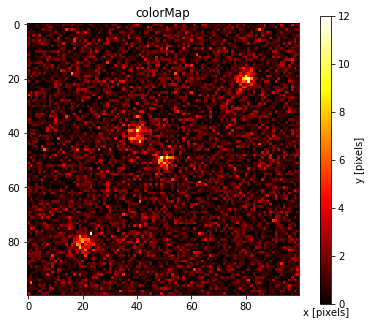

Instance info:
img_size: 100
exposure_time: 1
atom_variance: 5
quantum_efficiency: 1
atom count: 4
photons_in_background is set to 1 by default
SNR: 5
x0: [20 40 50 80]
y0: [80 40 50 20]


In [3]:
x1 = np.array([20, 40, 50, 80])
y1 = np.array([80, 40, 50, 20])
# x0 = x0[0]
# y0 = y0[0]
g2 = sim.create_simulation_from_SNR(x1, y1, 5, verbose=True)

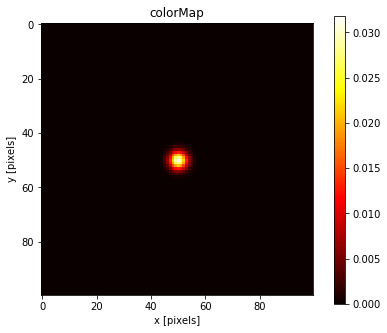

In [5]:
kernel = utils.gaussian_kernel(100, sim.variance, verbose=True)


1.0000000000000002
1.0000000000000002


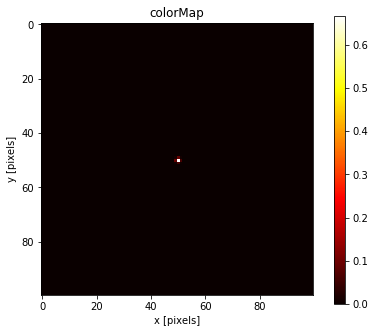

In [66]:
utils.visualize(deconv.richardson_lucy_deconv(kernel, kernel, 300))


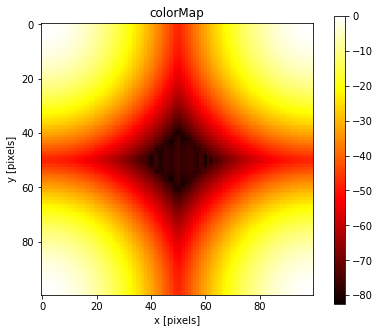

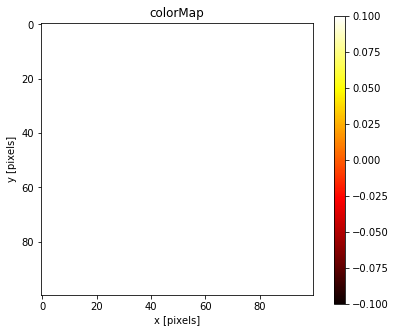

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [74]:
wiener_deconv1(kernel, kernel)

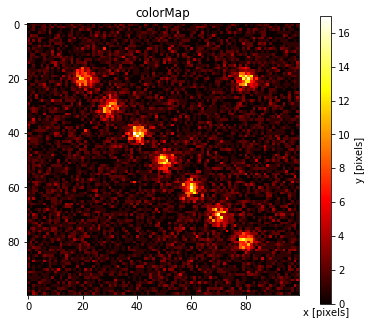

Instance info:
img_size: 100
exposure_time: 1
atom_variance: 5
quantum_efficiency: 1
atom count: 8
photons_in_background is set to 1 by default
SNR: 10
x0: [20. 30. 40. 50. 60. 70. 80. 80.]
y0: [20. 30. 40. 50. 60. 70. 80. 20.]


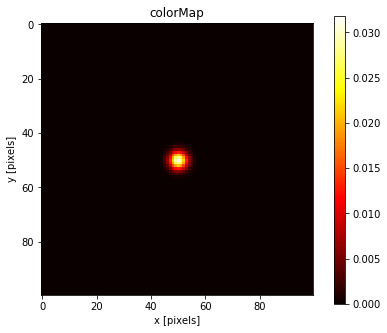

In [6]:
x0 = list(np.linspace(20, 80, 7))
y0 = list(np.linspace(20, 80, 7))

x0.append(80)
y0.append(20)
x0 = np.array(x0)
y0 = np.array(y0)

raw_image = sim.create_simulation_from_SNR(x0, y0, 10, verbose=True)
kernel = utils.gaussian_kernel(100, sim.variance, verbose=True)





Preprocessing:
------------------


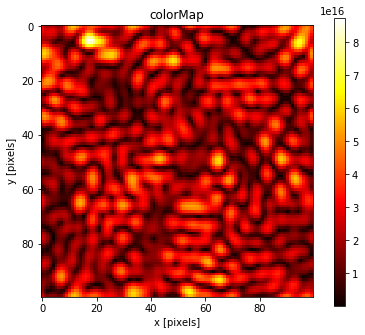

In [8]:
inv_filtered_image = deconv.inv_filter(raw_image, kernel)
utils.visualize(inv_filtered_image)

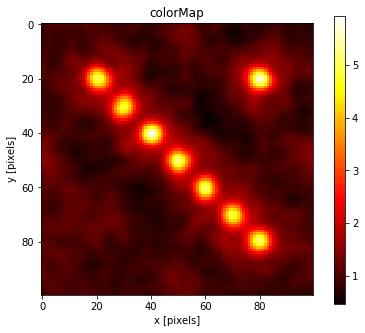

In [9]:
regularized_filtered_image = deconv.regularized_filter(raw_image, kernel, alpha=1)
utils.visualize(regularized_filtered_image)

1.0000000000000002
1.0


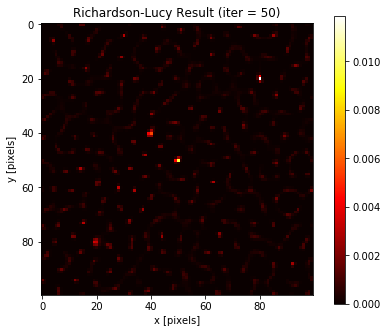

(100, 100)


In [10]:
rl_filtered_image = deconv.richardson_lucy_deconv(g2, kernel, 300)
utils.visualize(rl_filtered_image, title='Richardson-Lucy Result (iter = 50)')
print(rl_filtered_image.shape)

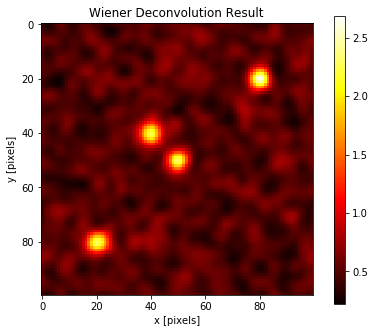

In [11]:
wiener_filtered_image = deconv.wiener_deconv(g2, kernel)
utils.visualize(wiener_filtered_image, title='Wiener Deconvolution Result')

Detecting Atoms Using the Filtered Image
-------------------------------

1. make a around the atom and then apply the naive classifier\\
2. do a binary classifier on every pixel

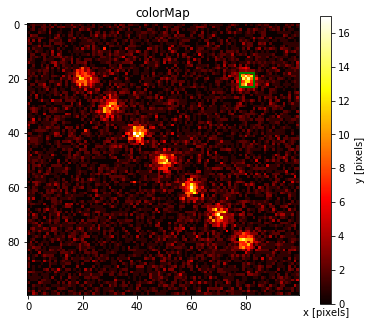

In [12]:
clf = naive_detector.detector(100, 80, 20, 5, 5)
clf.visualize_data(raw_image)
# clf.visualize_data(rl_filtered_image)

In [13]:
SNR = np.linspace(0.1, 2, 20)
x0 = list(np.linspace(20, 80, 7))
y0 = list(np.linspace(20, 80, 7))

x0.append(80)
y0.append(20)
x0 = np.array(x0)
y0 = np.array(y0)

data_tr, labels_tr = utils.generate_data_labels(100, x0, y0, SNR, 2000)
data_test, labels_test = utils.generate_data_labels(100, x0, y0, SNR, 700)
print(data_tr.shape, labels_tr.shape)
print(data_test.shape, labels_test.shape)


time used: 253.37898802757263
time used: 97.21656370162964
(20, 2000, 100, 100) (20, 2000)
(20, 700, 100, 100) (20, 700)


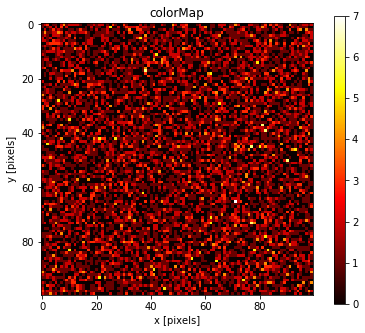

In [14]:
utils.visualize(data_tr[-1, 19, :, :])

Classifier Performance without Deconvolution
---------------------------------

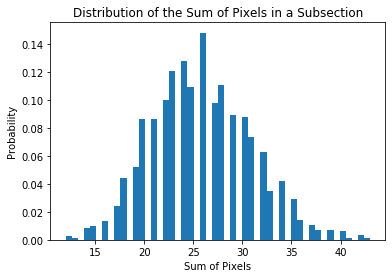

Training accuracy: 0.5619402985074626
Validation accuracy: 0.5424242424242425
Threshold: 22.333333333333336
SNR: 0.1


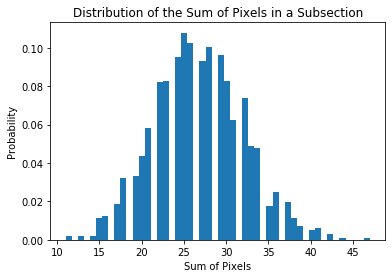

Training accuracy: 0.6485074626865671
Validation accuracy: 0.6318181818181818
Threshold: 25.823529411764707
SNR: 0.2


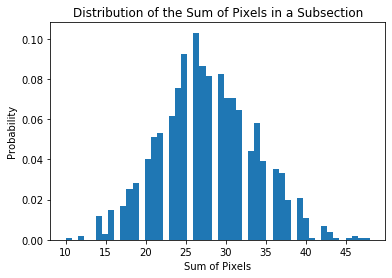

Training accuracy: 0.7119402985074627
Validation accuracy: 0.6712121212121213
Threshold: 26.88888888888889
SNR: 0.3


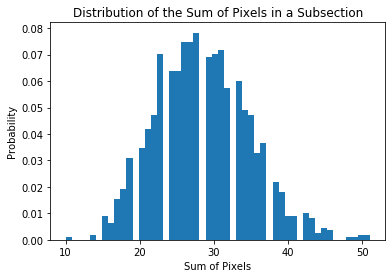

Training accuracy: 0.7492537313432835
Validation accuracy: 0.7424242424242424
Threshold: 28.45
SNR: 0.4


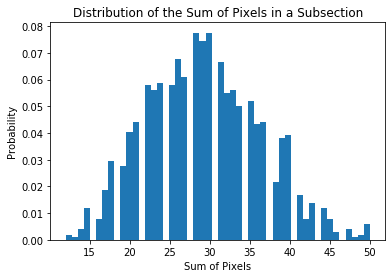

Training accuracy: 0.7798507462686567
Validation accuracy: 0.8090909090909091
Threshold: 28.88888888888889
SNR: 0.5


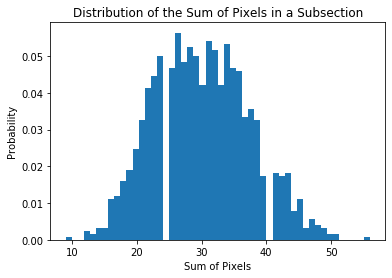

Training accuracy: 0.808955223880597
Validation accuracy: 0.8166666666666667
Threshold: 31.47826086956522
SNR: 0.6


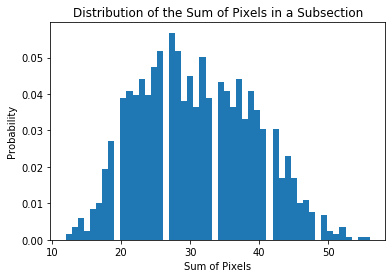

Training accuracy: 0.8761194029850746
Validation accuracy: 0.8803030303030303
Threshold: 30.857142857142858
SNR: 0.7


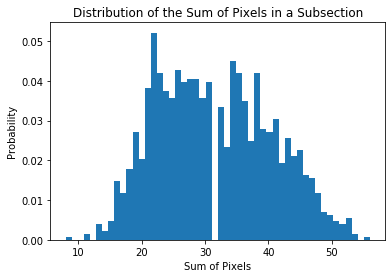

Training accuracy: 0.8888059701492538
Validation accuracy: 0.8878787878787879
Threshold: 30.956521739130434
SNR: 0.7999999999999999


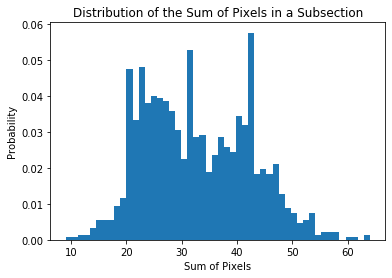

Training accuracy: 0.9097014925373135
Validation accuracy: 0.9166666666666666
Threshold: 31.40740740740741
SNR: 0.8999999999999999


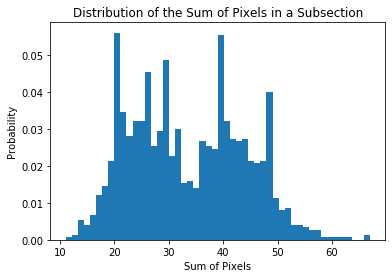

Training accuracy: 0.9380597014925374
Validation accuracy: 0.9272727272727272
Threshold: 33.81481481481481
SNR: 0.9999999999999999


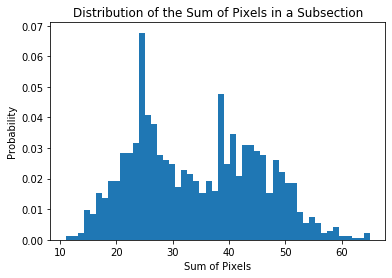

Training accuracy: 0.95
Validation accuracy: 0.9575757575757575
Threshold: 33.84615384615385
SNR: 1.0999999999999999


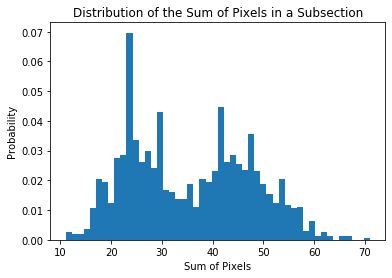

Training accuracy: 0.9619402985074627
Validation accuracy: 0.9742424242424242
Threshold: 35.827586206896555
SNR: 1.2


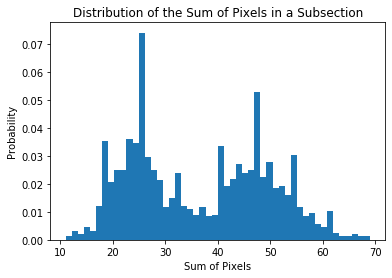

Training accuracy: 0.9604477611940299
Validation accuracy: 0.9681818181818181
Threshold: 33.78571428571429
SNR: 1.3


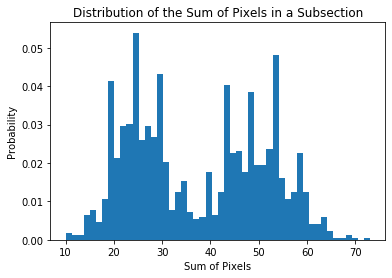

Training accuracy: 0.9798507462686568
Validation accuracy: 0.9681818181818181
Threshold: 34.38709677419355
SNR: 1.4


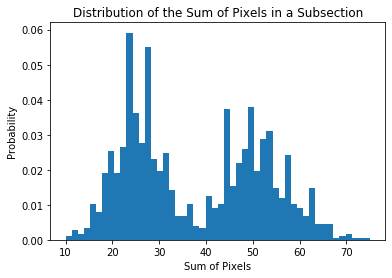

Training accuracy: 0.9843283582089553
Validation accuracy: 0.9878787878787879
Threshold: 36.40625
SNR: 1.5


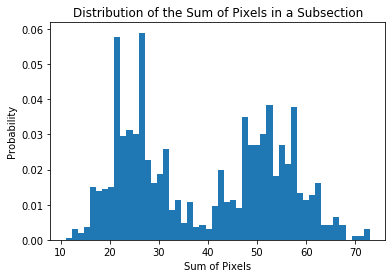

Training accuracy: 0.9865671641791045
Validation accuracy: 0.9848484848484849
Threshold: 35.800000000000004
SNR: 1.5999999999999999


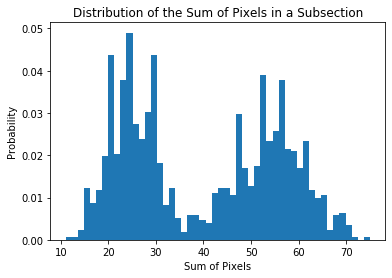

Training accuracy: 0.9902985074626866
Validation accuracy: 0.9893939393939394
Threshold: 37.83870967741935
SNR: 1.7


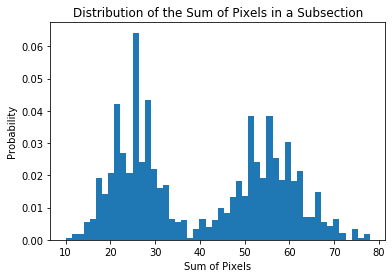

Training accuracy: 0.9902985074626866
Validation accuracy: 0.9939393939393939
Threshold: 36.78787878787879
SNR: 1.8


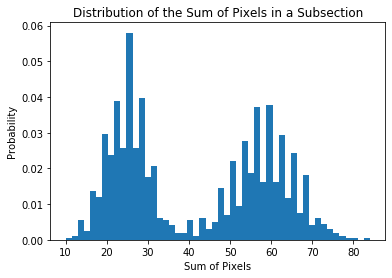

Training accuracy: 0.994776119402985
Validation accuracy: 0.996969696969697
Threshold: 38.77777777777777
SNR: 1.9


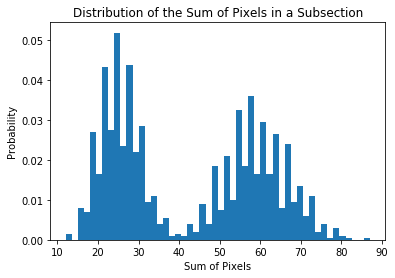

Training accuracy: 0.996268656716418
Validation accuracy: 1.0
Threshold: 38.351351351351354
SNR: 2.0


In [15]:
accuracies_tr, accuracies_val, thresholds = [], [], []
for i in range(data_tr.shape[0]):
    d_tr, l_tr = data_tr[i], labels_tr[i]
    accuracy_tr, accuracy_val, thresh = clf.train(d_tr, l_tr, verbose=True)
    accuracies_tr.append(accuracy_tr)
    accuracies_val.append(accuracy_val)
    thresholds.append(thresh)
    print(f"SNR: {SNR[i]}")


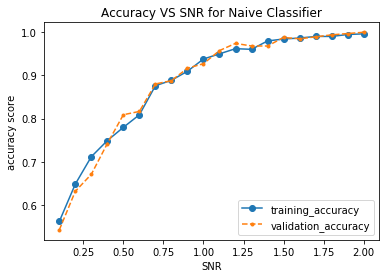

In [16]:
plt.plot(SNR, accuracies_tr, marker='o')
plt.plot(SNR, accuracies_val, marker='.', linestyle='--')
plt.legend(['training_accuracy', 'validation_accuracy'], loc='lower right')
plt.xlabel("SNR")
plt.ylabel("accuracy score")
plt.title("Accuracy VS SNR for Naive Classifier")
plt.show()

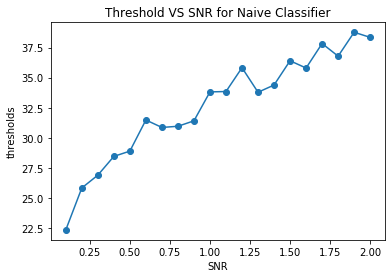

In [17]:
plt.plot(SNR, thresholds, marker='o')
plt.xlabel("SNR")
plt.ylabel("thresholds")
plt.title("Threshold VS SNR for Naive Classifier")
plt.show()

Classifier Performance with Deconvolution
-------------------------------

In [52]:
# filter data_tr, which is not normalized
prev_time = time.time()
filtered_data_tr = []
for i in range(data_tr.shape[0]):
    snr_lst = []
    for j in range(data_tr.shape[1]):
        image = data_tr[i, j]
        filtered_image = deconv.richardson_lucy_deconv(image, kernel)
        snr_lst.append(filtered_image)
    filtered_data_tr.append(snr_lst)
filtered_data_tr = np.array(filtered_data_tr)
print(f"time elapsed: {time.time() - prev_time}")

prev_time = time.time()
filtered_data_test = []
for i in range(data_test.shape[0]):
    snr_lst = []
    for j in range(data_test.shape[1]):
        image = data_test[i, j]
        filtered_image = deconv.richardson_lucy_deconv(image, kernel)
        snr_lst.append(filtered_image)
    filtered_data_test.append(snr_lst)
filtered_data_test = np.array(filtered_data_test)
print(f"time elapsed: {time.time() - prev_time}")

KeyboardInterrupt: 

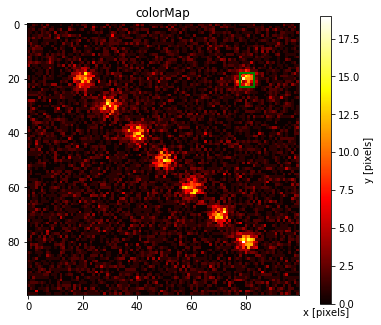

In [15]:
clf2 = naive_detector.detector(100, 80, 20, 5, 5)
clf2.visualize_data(raw_image)

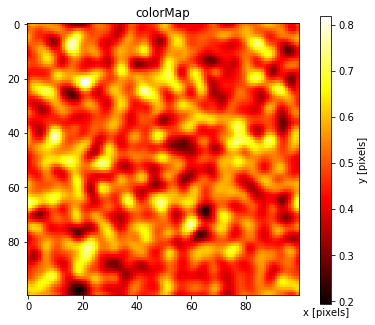

In [16]:
visualize(filtered_data_tr[0, 100, :, :])

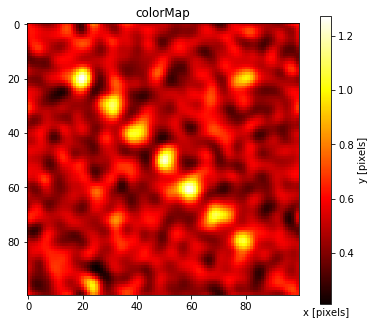

In [17]:
visualize(deconv.wiener_deconv(data_tr[-1, 2, :, :], kernel))

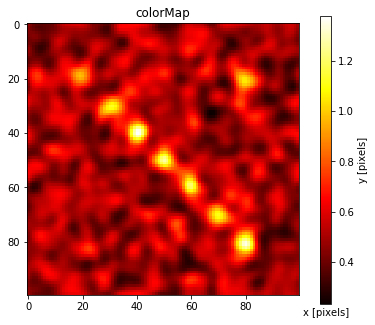

In [18]:
visualize(filtered_data_tr[-1, 8, :, :])

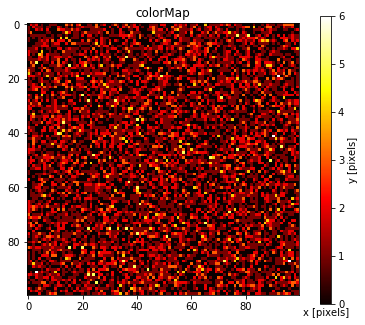

In [19]:
visualize(data_tr[0, 10, :, :])


In [40]:
""" When applying Wiener Deconv to this particular data, the result has periodic horizontal lines, why??"""
# arr = data_tr[-1, 1895, :, :]
# f = open("wierd_data2.txt", "w")
# for line in arr:
    
#     f.write(np.array_str(line))
#     f.write('\n')
# f.close()

maxsumidx: 334
maxsum:56.73023085536826
minsum:17.360401815167332


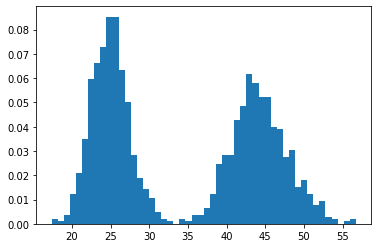

Training accuracy: 0.9992537313432835
Validation accuracy: 1.0
Threshold: 33.93717193735719


(0.9992537313432835, 1.0, 33.93717193735719)

In [44]:
clf2.train(filtered_data_tr[-1], labels_tr[-1], verbose=True)

In [42]:
sums = [] 
for data in filtered_data_tr[-1, :, :, :]:
    sums.append(np.sum(data[18:23, 78:84]))
print(np.max(sums))
print(np.argmax(sums))

66.52155296656142
1278


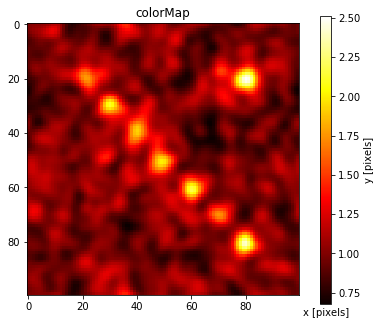

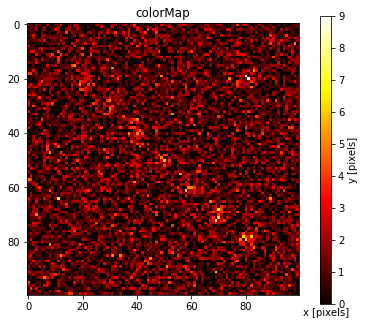

In [43]:
visualize(filtered_data_tr[-1, 1278, :, :])
visualize(data_tr[-1, 1895, :, :])

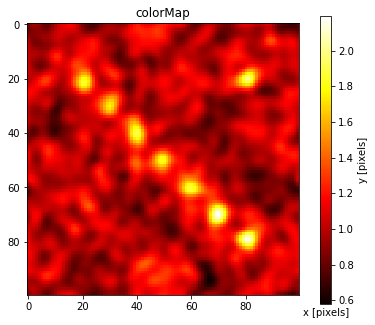

In [39]:
sample = data_tr[-1, 1895, :, :]
visualize(deconv.regularized_filter(sample, kernel))


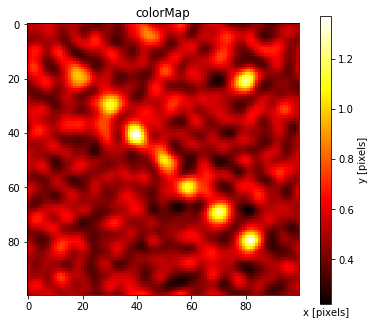

In [31]:
visualize(filtered_data_tr[-1, 1148])

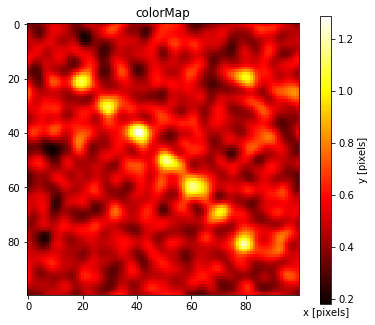

In [26]:
visualize(filtered_data_tr[-1, 11, :, :])

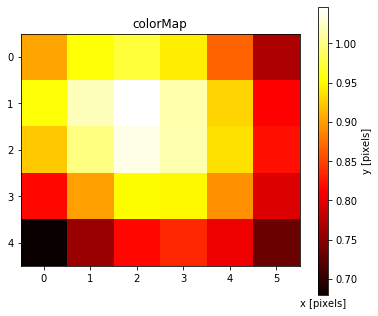

26.874715318427995


In [27]:
data = filtered_data_tr[-1, 11 , :, :]
# for i in range(18, 24):
#     for j in range(78, 84):
#         data[i, j] = 0
visualize(data[18:23, 78:84])
# visualize(data)
print(np.sum(data[18:23, 78:84]))

In [28]:
clf2.train(data, )

TypeError: train() missing 1 required positional argument: 'labels'

maxsumidx: 1117
maxsum:34.19654339397228
minsum:18.423591342860718


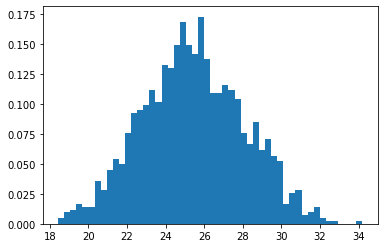

Training accuracy: 0.5552238805970149
Validation accuracy: 0.5515151515151515
Threshold: 22.930149071749735
SNR: 0.1
maxsumidx: 1187
maxsum:35.164658726227266
minsum:15.985279064048246


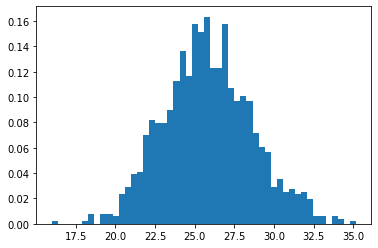

Training accuracy: 0.6843283582089552
Validation accuracy: 0.6757575757575758
Threshold: 26.640489987481036
SNR: 0.2
maxsumidx: 513
maxsum:36.84062095106646
minsum:18.445519550073154


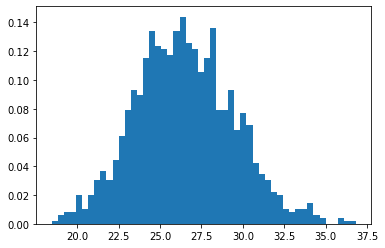

Training accuracy: 0.6708955223880597
Validation accuracy: 0.6818181818181818
Threshold: 25.343682575445644
SNR: 0.3
maxsumidx: 1183
maxsum:39.68945064145649
minsum:17.71043493378422


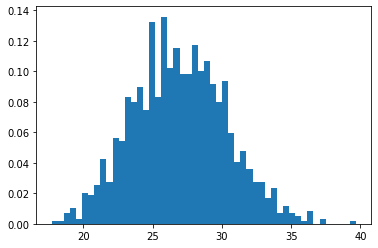

Training accuracy: 0.7783582089552239
Validation accuracy: 0.7606060606060606
Threshold: 26.50204121685313
SNR: 0.4
maxsumidx: 748
maxsum:38.8607665844968
minsum:17.985746278592757


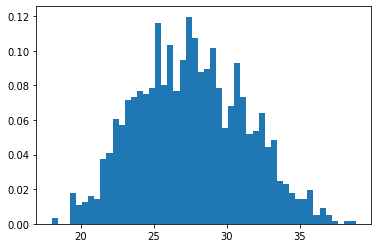

Training accuracy: 0.8111940298507463
Validation accuracy: 0.8136363636363636
Threshold: 27.263533081216778
SNR: 0.5
maxsumidx: 844
maxsum:41.976178725288555
minsum:17.276361314768913


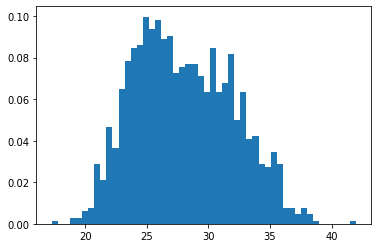

Training accuracy: 0.8507462686567164
Validation accuracy: 0.8484848484848485
Threshold: 28.503551046823297
SNR: 0.6
maxsumidx: 281
maxsum:41.88658553974603
minsum:17.30011207609872


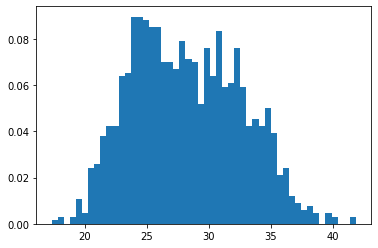

Training accuracy: 0.8761194029850746
Validation accuracy: 0.8954545454545455
Threshold: 28.47578183230204
SNR: 0.7
maxsumidx: 1250
maxsum:42.455400007521526
minsum:17.05674383352883


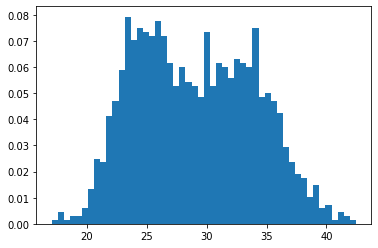

Training accuracy: 0.908955223880597
Validation accuracy: 0.8833333333333333
Threshold: 27.639517239359122
SNR: 0.7999999999999999
maxsumidx: 738
maxsum:42.34226130209174
minsum:17.83647857222749


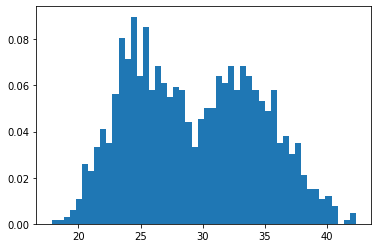

Training accuracy: 0.9298507462686567
Validation accuracy: 0.9196969696969697
Threshold: 28.975470722165788
SNR: 0.8999999999999999
maxsumidx: 933
maxsum:45.82990979695256
minsum:16.980555820031057


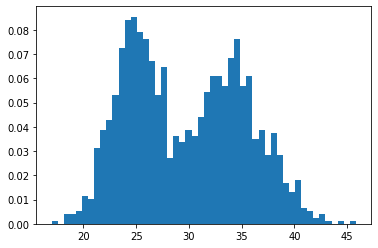

Training accuracy: 0.9462686567164179
Validation accuracy: 0.9545454545454546
Threshold: 30.295642270917906
SNR: 0.9999999999999999
maxsumidx: 1299
maxsum:45.22319225873339
minsum:16.698004894502894


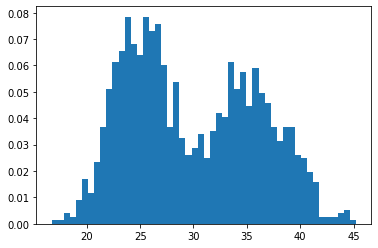

Training accuracy: 0.9694029850746269
Validation accuracy: 0.9712121212121212
Threshold: 29.8634759856862
SNR: 1.0999999999999999
maxsumidx: 749
maxsum:49.10789037166545
minsum:17.94944196829396


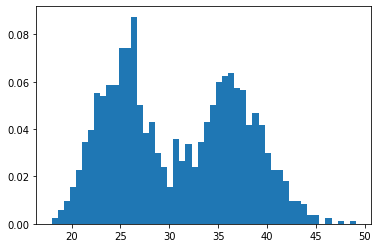

Training accuracy: 0.9694029850746269
Validation accuracy: 0.9818181818181818
Threshold: 30.412821329642554
SNR: 1.2
maxsumidx: 958
maxsum:50.070975996387965
minsum:17.49762973443818


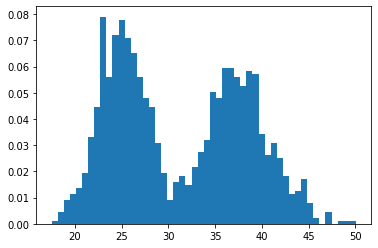

Training accuracy: 0.9850746268656716
Validation accuracy: 0.9742424242424242
Threshold: 30.526968239218093
SNR: 1.3
maxsumidx: 140
maxsum:50.35493904262555
minsum:17.05597977030156


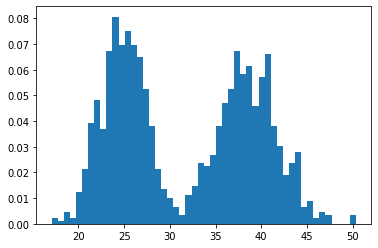

Training accuracy: 0.9932835820895523
Validation accuracy: 0.9878787878787879
Threshold: 31.624274451943307
SNR: 1.4
maxsumidx: 509
maxsum:51.71094349363112
minsum:18.339526822122156


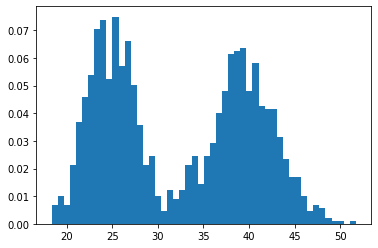

Training accuracy: 0.991044776119403
Validation accuracy: 0.990909090909091
Threshold: 30.85380807393802
SNR: 1.5
maxsumidx: 497
maxsum:52.00085423227366
minsum:16.87459775364483


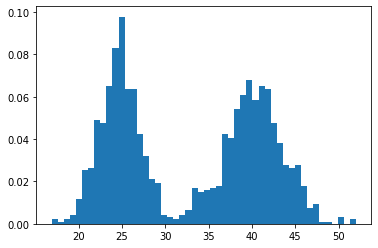

Training accuracy: 0.996268656716418
Validation accuracy: 0.9893939393939394
Threshold: 31.33835042131553
SNR: 1.5999999999999999
maxsumidx: 280
maxsum:54.386007679603615
minsum:18.492641115083494


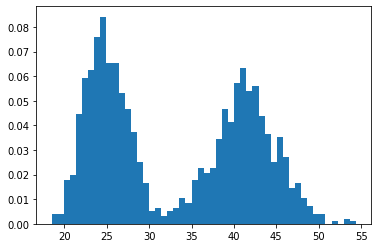

Training accuracy: 0.9895522388059701
Validation accuracy: 0.9984848484848485
Threshold: 33.2722626416506
SNR: 1.7
maxsumidx: 942
maxsum:56.079075396675336
minsum:17.835507626610053


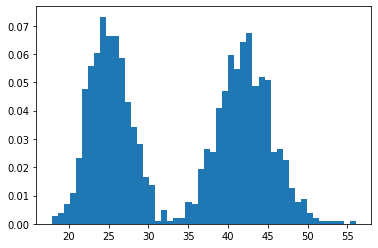

Training accuracy: 0.9940298507462687
Validation accuracy: 0.9939393939393939
Threshold: 30.58336354996515
SNR: 1.8
maxsumidx: 323
maxsum:54.02336392489777
minsum:18.225966827992114


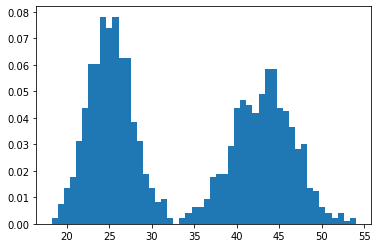

Training accuracy: 0.9992537313432835
Validation accuracy: 0.996969696969697
Threshold: 32.96607151495327
SNR: 1.9
maxsumidx: 516
maxsum:56.73023085536826
minsum:17.360401815167332


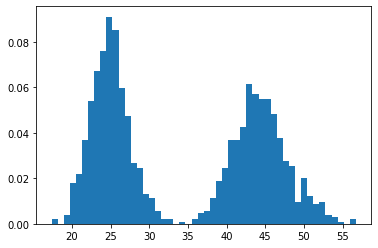

Training accuracy: 1.0
Validation accuracy: 0.9984848484848485
Threshold: 33.93717193735719
SNR: 2.0


In [45]:
filtered_accuracies_tr, filtered_accuracies_val, filtered_thresholds = [], [], []
for i in range(filtered_data_tr.shape[0]):
    d_tr, l_tr = filtered_data_tr[i], labels_tr[i]
    filtered_accuracy_tr, filtered_accuracy_val, filtered_thresh = clf2.train(d_tr, l_tr, verbose=True)
    filtered_accuracies_tr.append(filtered_accuracy_tr)
    filtered_accuracies_val.append(filtered_accuracy_val)
    filtered_thresholds.append(filtered_thresh)
    print(f"SNR: {SNR[i]}")


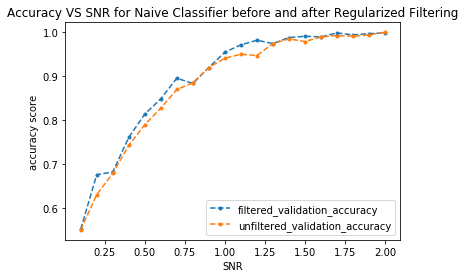

In [51]:
# plt.plot(SNR, filtered_accuracies_tr, marker='o')
plt.plot(SNR, filtered_accuracies_val, marker='.', linestyle='--')
# plt.plot(SNR, accuracies_tr, marker='o')
plt.plot(SNR, accuracies_val, marker='.', linestyle='--')
# plt.legend(['filtered_training_accuracy', 'filtered_validation_accuracy', 'training_accuracy', 'validation_accuracy'], loc='lower right')
plt.legend(['filtered_validation_accuracy', 'unfiltered_validation_accuracy'])
plt.xlabel("SNR")
plt.ylabel("accuracy score")
plt.title("Accuracy VS SNR for Naive Classifier before and after Regularized Filtering")
plt.show()

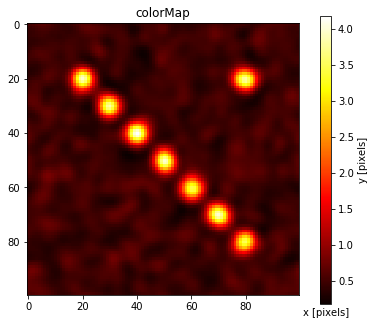

In [30]:
b = deconv.wiener_deconv(raw_image, kernel)
visualize(b)

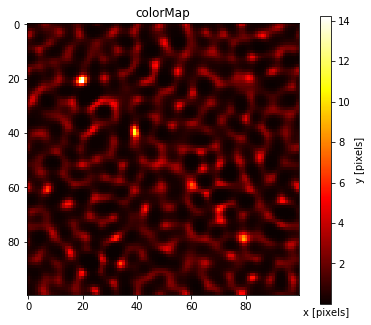

In [31]:
d = data_tr[-1, 9]
a = deconv.richardson_lucy_deconv(d, kernel, 30)
visualize(a)

In [18]:
file_name = "wierd_data2.txt"
def read_from_file(file_name):
    output_arr = []
    with open(file_name) as f:
        for line in f:
            lines = []
            if line[0] == '[':
            
                lines.extend([float(n) for n in line.strip('[] \n').split(' ')])
                output_arr.append(lines)
            elif line.strip()[-1] == ']':
                output_arr[-1].extend([float(n) for n in line.strip('] \n').split(' ')])

            else:
                output_arr[-1].extend([float(n) for n in line.strip().split(' ')])
    output_arr = np.array(output_arr)
    return output_arr


In [19]:
wierd_data1 = read_from_file('wierd_data.txt')
wierd_data2 = read_from_file('wierd_data2.txt')

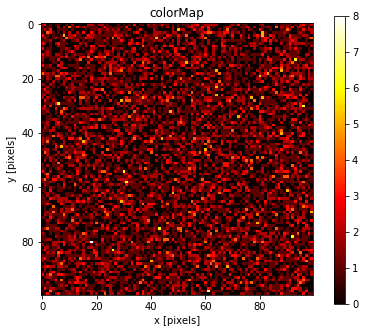

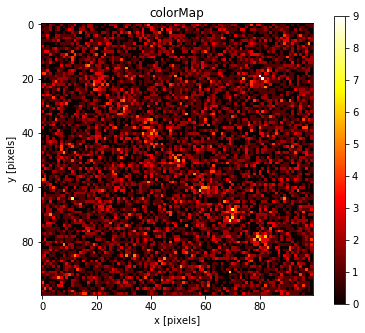

In [21]:
utils.visualize(wierd_data1)
utils.visualize(wierd_data2)

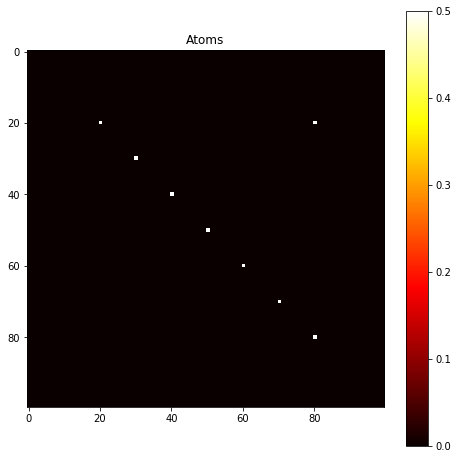

In [253]:
img_size = 100
from utils import gaussian

def original_img(img_size, x0, y0):
    img = np.zeros((img_size, img_size))
    for i in range(len(x0)):
        x = int(x0[i])
        y = int(y0[i])
        img[x, y] = 0.5
    return img

def create_signal(img_size, x0, y0, strength):      
    signals = [] 
    
    for i in range(x0.shape[0]):
        x = y = np.linspace(0, img_size-1, img_size)
        xgrid, ygrid = np.meshgrid(x, y)  
        signal =  gaussian(xgrid, ygrid, y0[i], x0[i], 5) * strength
        signals.append(signal)
    
    signals = np.array(signals)
    return np.sum(signals, axis=0)

    
x0 = list(np.linspace(20, 80, 7))
y0 = list(np.linspace(20, 80, 7))
x0.append(20)
y0.append(80)
x0 = np.array(x0)
y0 = np.array(y0)

# x0 = x0[0:1]
# y0 = y0[0:1]
# img = create_signal(100, x0, y0)
img = original_img(100, x0, y0)
plt.figure(figsize=(8,8))
plt.title("Atoms")
plt.imshow(img, cmap='hot')
plt.colorbar()
plt.show()

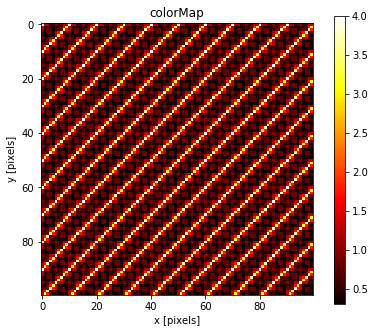

In [214]:
img_fourier = np.fft.fft2(img)
utils.visualize(np.abs(np.fft.fftshift(img_fourier)))
img_spectra = img_fourier * np.conj(img_fourier)

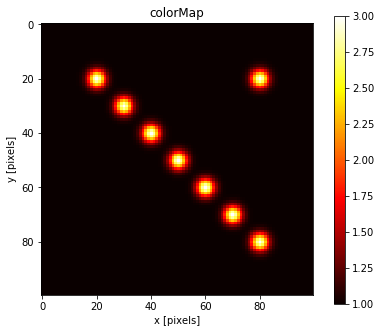

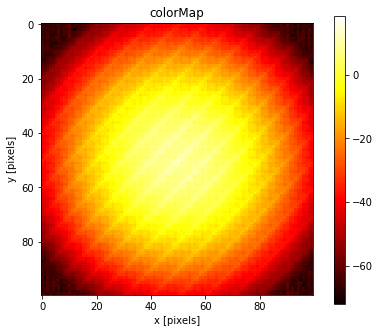

In [258]:
noise = create_signal(100, x0, y0, 2)
# print(np.sum(noise))
# for i in range(noise.shape[0]):
#     for j in range(noise.shape[1]):
#         if noise[i, j] <= 1:
#             noise[i, j] = 1
noise = noise + 1.
utils.visualize(noise)
noise_fourier = np.fft.fft2(noise)
noise_spectra = noise_fourier * np.conj(noise_fourier)
utils.visualize(np.log(np.abs(np.fft.fftshift(noise_spectra))))

In [221]:
# noise_spectra and obj_spectra should be in fourier space
def wiener_deconv1(img, kernel, noise_spectra=None, obj_spectra=None):
    """
    computes 1/H * (1/(1+1/(H^2+S/V)))
    Wiener deconv assumes noise has average of 0, but in this case the average is not 0
    """

    # img_spectra = noise_spectra + obj_spectra \times |kernel_fourier|^2
    # img = img - 0.5 
    kernel_fourier = np.fft.fft2(kernel)
    img_fourier = np.fft.fft2(img)
    if noise_spectra is None or obj_spectra is None: 

        img_spectra = img_fourier * np.conj(img_fourier)
        # noise has a default mean of 1, noise_spectra is a delta
        noise_fourier = np.fft.fft2(np.full(img_fourier.shape, 1.))
        noise_spectra = noise_fourier * np.conj(noise_fourier)
        # noise_spectra = np.abs(np.full(img_fourier.shape, 1.))
        obj_spectra = (img_spectra - noise_spectra) / (kernel_fourier * np.conj(kernel_fourier) + 1e-36)


    # a= np.fft.fftshift(img_spectra)
    b = np.fft.fftshift(noise_spectra)
    c = np.fft.fftshift(obj_spectra)
    d = np.fft.fftshift(kernel_fourier * np.conj(kernel_fourier))
    e = d * c
    f = d * c + b

    # utils.visualize(np.log(np.real(a)))
    # utils.visualize(np.real(b))
    utils.visualize(np.log(np.abs(c)))
    utils.visualize(np.abs(d))
    utils.visualize(np.abs(e))
    utils.visualize(np.abs(f))
    # utils.visualize(np.abs(np.fft.fftshift(np.conj(kernel_fourier))))
    # SNR = obj_spectra / noise_spectra
    # a = 1 / kernel_fourier * (1 / (1 + 1/(np.abs(kernel_fourier)**2 * SNR)))
    a = np.conj(kernel_fourier) * obj_spectra / (noise_spectra + kernel_fourier * np.conj(kernel_fourier) * obj_spectra)
    return np.abs(np.fft.fftshift(np.fft.ifft2(a * img_fourier)))


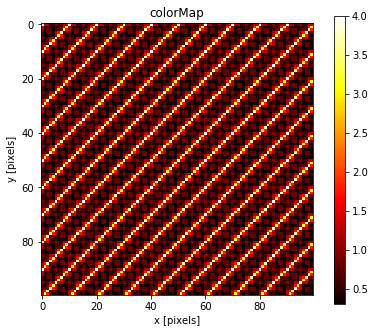

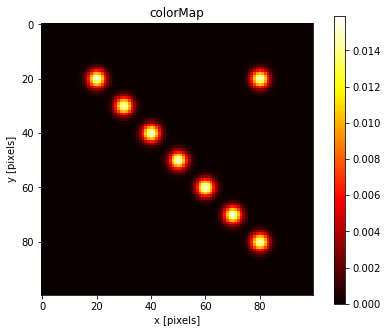

In [220]:
utils.visualize(np.abs(img_fourier))
zz = img_fourier * np.fft.fft2(kernel)
utils.visualize(np.abs(np.fft.fftshift(np.fft.ifft2(zz))))

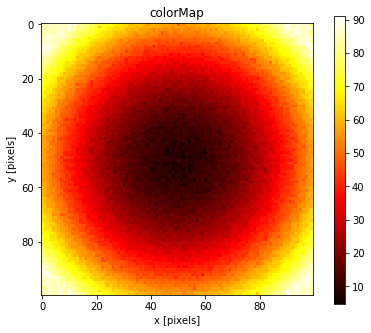

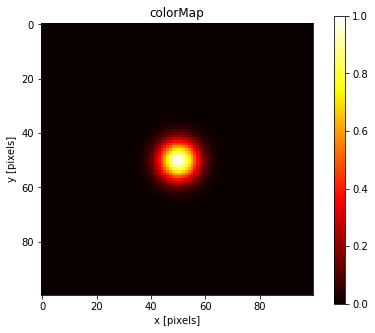

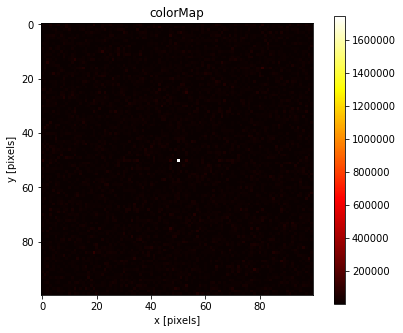

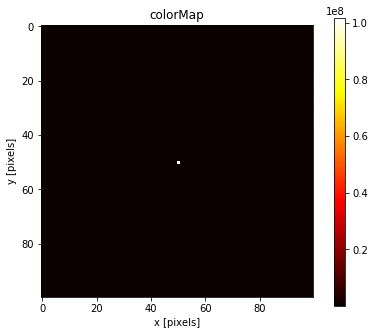

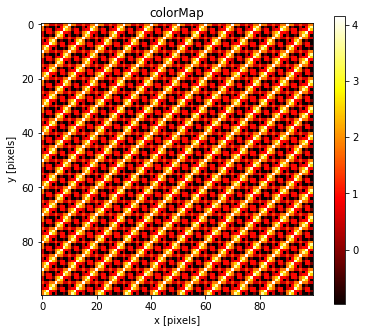

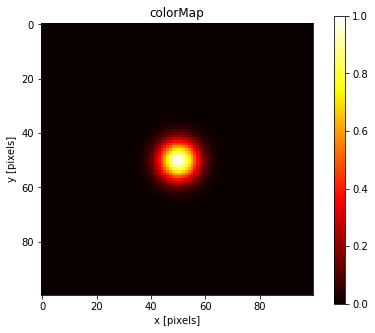

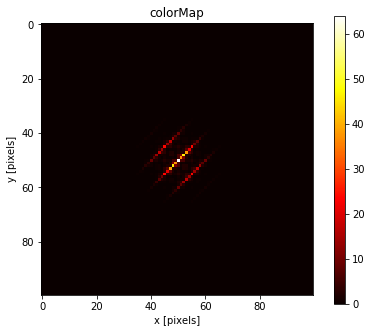

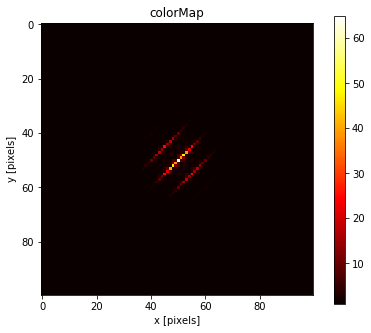

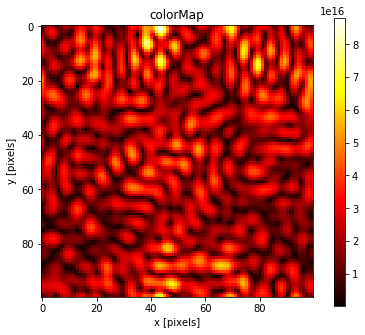

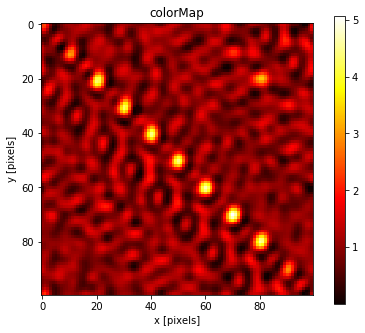

In [201]:
a = wiener_deconv1(wierd_data1, kernel)
b = wiener_deconv1(wierd_data2, kernel, noise_spectra=np.full((100,100), 1.), obj_spectra=img_spectra)

utils.visualize(a)
utils.visualize(b)


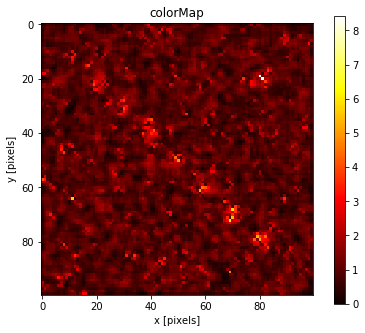

In [121]:
from scipy.signal import wiener

utils.visualize(wiener(wierd_data2, noise=np.full((100,100), 1.)))

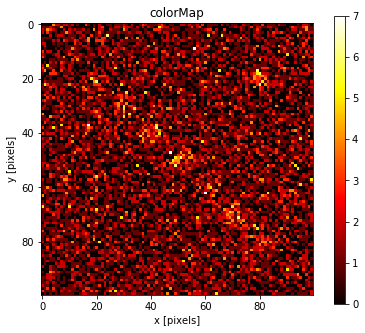

In [202]:
test = data_tr[-1, 0]
utils.visualize(test)


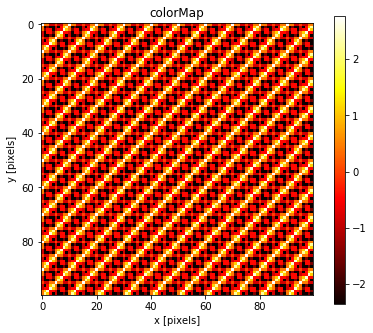

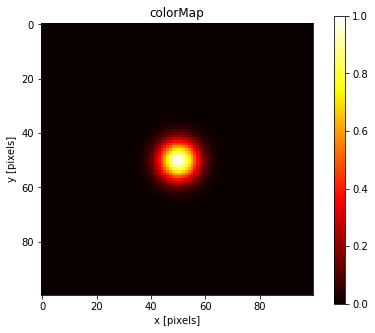

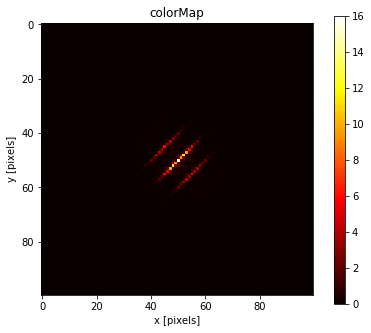

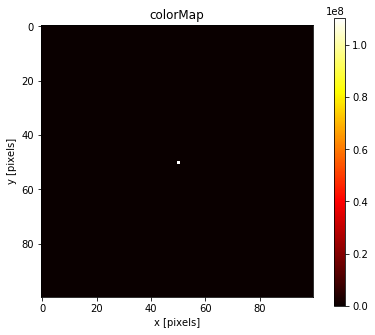

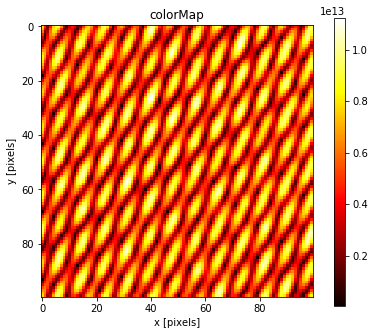

In [259]:
# test1 = deconv.regularized_filter(test, kernel)
# utils.visualize(test1)
test1 = wiener_deconv1(test, kernel, noise_spectra=noise_spectra, obj_spectra=img_spectra)
utils.visualize(test1)

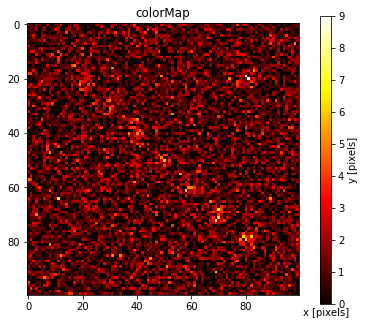

In [128]:
visualize(output_arr)

In [135]:
utils.visualize(deconv.wiener_deconv(output_arr, kernel))

NameError: name 'output_arr' is not defined

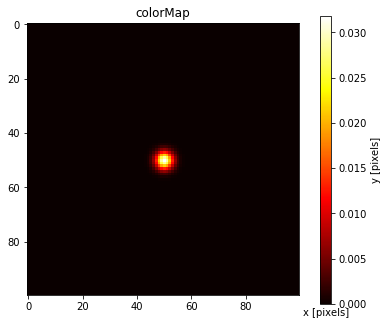

In [131]:
visualize(kernel)

In [57]:
a = "hi"
a[0]

'h'

In [125]:
line = '[hello]\n '
line.strip()

'[hello]'

In [ ]:
test